# **liteCLIP zero-shot inference**

Zero-shot image classification is a computer vision task to classify images into one of several classes, without any prior training or knowledge of the classes.

Zero shot image classification works by transferring knowledge learnt during training of one model, to classify novel classes that was not present in the training data. So this is a variation of transfer learning. For instance, a model trained to differentiate cars from airplanes can be used to classify images of ships.

The data in this learning paradigm consists of

- Seen data - images and their corresponding labels
- Unseen data - only labels and no images
- Auxiliary information - additional information given to the model during training connecting the unseen and seen data. This can be in the form of textual description or word embeddings.

Use Cases:
- image retrieval
- action recognition

[via huggingface](https://huggingface.co/tasks/zero-shot-image-classification)

In [68]:
from PIL import Image
from liteclip import ZeroShotPipeline

In [69]:
pipeline = ZeroShotPipeline()

## The below images are random images I chose from the web

a photo of a cat: 99.29%
a photo of a dog: 0.62%
the photo of a human baby: 0.08%


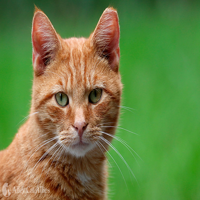

In [70]:
predictions = pipeline.predict('examples/cat.jpg',
                               ['a photo of a dog',
                                'a photo of a cat',
                                'the photo of a human baby'
                               ])
for label,prob in predictions:
    print(f"{label}: {prob*100:.2f}%")
Image.open('examples/cat.jpg').resize((200,200))

a cat stuck in a door: 90.87%
a cat sitting: 6.61%
a cat standing: 1.81%
a cat is entering the void: 0.57%
a cat in the air: 0.09%


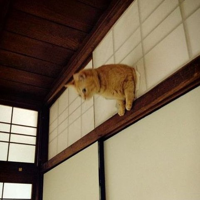

In [71]:
l = 'a cat in the air;a cat sitting;a cat standing;a cat is entering the matrix;a cat stuck in a door;a cat is entering the void'
predictions = pipeline.predict('examples/catstuckindoor.jpeg',
                               l.split(';'))

for label,prob in predictions:
    print(f"{label}: {prob*100:.2f}%")
Image.open('examples/catstuckindoor.jpeg').resize((200,200))

image of a car: 95.25%
photo of a sports car: 4.71%
photo of a truck: 0.03%
a bike is in the image: 0.00%


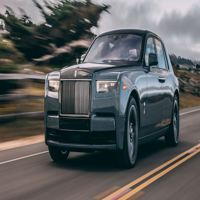

In [72]:
predictions = pipeline.predict('examples/car.jpg',
                               ['photo of a sports car',
                                'image of a car',
                                'photo of a truck',
                                'a bike is in the image'
                               ]
                              )
for label,prob in predictions:
    print(f"{label}: {prob*100:.2f}%")
Image.open('examples/car.jpg').resize((200,200))

a person dancing: 50.08%
a person doing exercise: 49.91%
a person singing: 0.01%


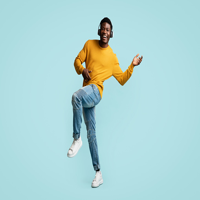

In [73]:
predictions = pipeline.predict('examples/dancing.jpg',
                               ['a person dancing',
                                'a person singing',
                                'a person doing exercise'
                               ]
                              )
for label,prob in predictions:
    print(f"{label}: {prob*100:.2f}%")
Image.open('examples/dancing.jpg').resize((200,200))